<a href="https://www.kaggle.com/code/sayedshaun/disaster-tweets-prediction-nlp?scriptVersionId=141828873" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
from textblob import TextBlob
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.tokenize import word_tokenize, sent_tokenize

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
train = pd.read_csv("/kaggle/input/nlp-getting-started/train.csv")
test = pd.read_csv("/kaggle/input/nlp-getting-started/test.csv")

In [3]:
train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [5]:
train["location"] = train["location"].fillna("Unnamed")
train["keyword"] = train["keyword"].fillna("Unknown")

In [6]:
train

,id,keyword,location,text,target
0,1,Unknown,Unnamed,Our Deeds are the Reason of this #earthquake M...,1
1,4,Unknown,Unnamed,Forest fire near La Ronge Sask. Canada,1
2,5,Unknown,Unnamed,All residents asked to 'shelter in place' are ...,1
3,6,Unknown,Unnamed,"13,000 people receive #wildfires evacuation or...",1
4,7,Unknown,Unnamed,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,Unknown,Unnamed,Two giant cranes holding a bridge collapse int...,1
7609,10870,Unknown,Unnamed,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,Unknown,Unnamed,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,Unknown,Unnamed,Police investigating after an e-bike collided ...,1


In [7]:
class Preprocessing:
    def __init__(self):
        self.html_pattern = r'<.*?>'
        self.urls_pattern = r'https?://\S+|www\.\S+'
        self.noise_pattern = r'[\d!@#$%^&*()?><:"|;\'.]'
        self.re_escape = f"[{re.escape(string.punctuation)}]"
        self.stopwords = stopwords.words("english")
        self.stem = PorterStemmer()
        self.token = word_tokenize
        self.emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"
                           u"\U0001F300-\U0001F5FF"  
                           u"\U0001F680-\U0001F6FF"  
                           u"\U0001F1E0-\U0001F1FF"  
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
        
    
    def make_lower(self, text):
        return text.lower()
    
    def remove_html_urls(self, text):
        clean_text = re.sub(self.html_pattern, "", text)
        clean_text = re.sub(self.urls_pattern, "", clean_text)
        clean_text = re.sub(self.noise_pattern, "", clean_text)
        return clean_text
    
    def remove_emoji(self, text):
        clean_text = re.sub(self.emoji_pattern, "", text)
        return clean_text
    
    def remove_punctuation(self, text):
        clean_text = re.sub(self.re_escape, "", text)
        return clean_text
    
    def correct_spelling(self, text):
        arr = []
        for i in text.split():
            x = TextBlob(i)
            arr.append(str(x.correct()))
            
        return " ".join(arr)
            
        
    def remove_stopwords(self, text):
        return " ".join([i for i in text.split() if i not in self.stopwords])
    
    def tokenize(self, text):
        return " ".join(self.token(text, language="english"))
    
    def steamer(self, text):
        arr = []
        for i in text.split():
            x = self.stem.stem(i)
            arr.append(x)
        return " ".join(arr)
        
pre = Preprocessing()

In [8]:
train["text"] = train["text"].apply(pre.remove_html_urls)
train["text"] = train["text"].apply(pre.remove_punctuation)
train["text"] = train["text"].apply(pre.remove_emoji)
train["text"] = train["text"].apply(pre.tokenize)
train["text"] = train["text"].apply(pre.steamer)
train["text"] = train["text"].apply(pre.remove_stopwords)
#train["text"] = train["text"].apply(pre.correct_spelling)

In [9]:
train["location"] = train["location"].apply(pre.remove_html_urls)
train["location"] = train["location"].apply(pre.remove_punctuation)
train["location"] = train["location"].apply(pre.remove_emoji)
train["location"] = train["location"].apply(pre.tokenize)
#train["location"] = train["location"].apply(pre.steamer)
#train["location"] = train["location"].apply(pre.remove_stopwords)

In [10]:
train["keyword"] = train["keyword"].apply(pre.remove_html_urls)
train["keyword"] = train["keyword"].apply(pre.remove_punctuation)
train["keyword"] = train["keyword"].apply(pre.remove_emoji)
train["keyword"] = train["keyword"].apply(pre.tokenize)
#train["keyword"] = train["keyword"].apply(pre.steamer)
#train["keyword"] = train["keyword"].apply(pre.remove_stopwords)

In [11]:
train

,id,keyword,location,text,target
0,1,Unknown,Unnamed,deed reason thi earthquak may allah forgiv us,1
1,4,Unknown,Unnamed,forest fire near La rong sask canada,1
2,5,Unknown,Unnamed,resid ask shelter place notifi offic No evacu ...,1
3,6,Unknown,Unnamed,peopl receiv wildfir evacu order california,1
4,7,Unknown,Unnamed,got sent thi photo rubi alaska smoke wildfir p...,1
...,...,...,...,...,...
7608,10869,Unknown,Unnamed,two giant crane hold bridg collaps nearbi home,1
7609,10870,Unknown,Unnamed,ariaahrari thetawniest control wild fire calif...,1
7610,10871,Unknown,Unnamed,M utckm S volcano hawaii,1
7611,10872,Unknown,Unnamed,polic investig ebik collid car littl portug eb...,1


In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7613 non-null   object
 2   location  7613 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [13]:
train.describe()[["target"]]

,target
count,7613.00000
mean,0.42966
std,0.49506
min,0.00000
25%,0.00000
50%,0.00000
75%,1.00000
max,1.00000


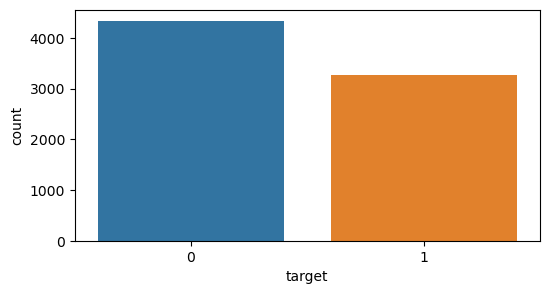

In [14]:
plt.figure(figsize=[6,3])
sns.countplot(x=train["target"], data=train)
plt.show()

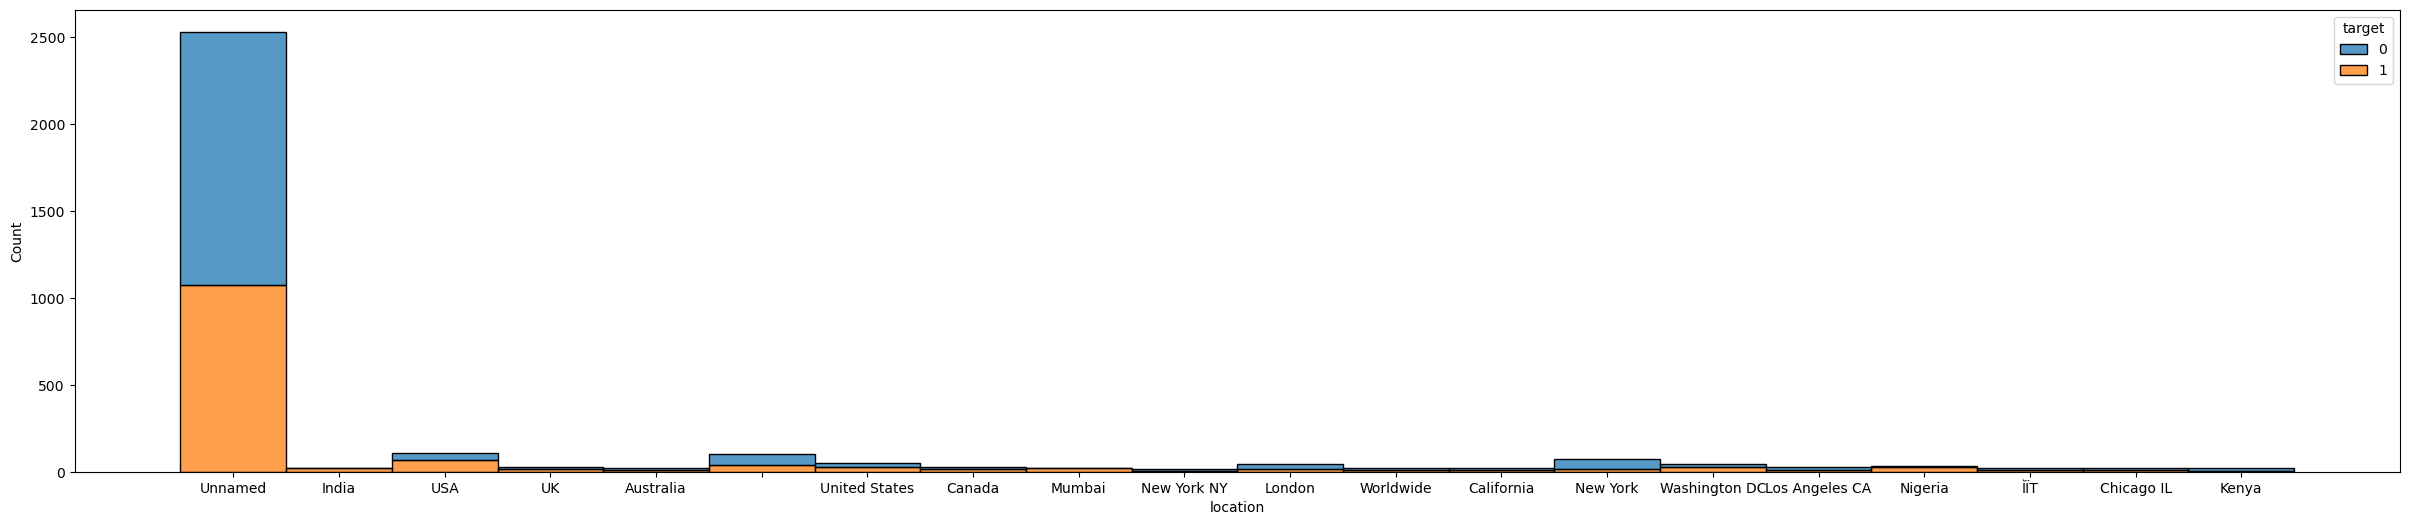

In [15]:
top_locations = train["location"].value_counts().nlargest(20).index
train_top_locations = train[train["location"].isin(top_locations)]

plt.figure(figsize=[30,6])
sns.histplot(data=train_top_locations, x="location", hue="target", multiple="stack")
plt.show()


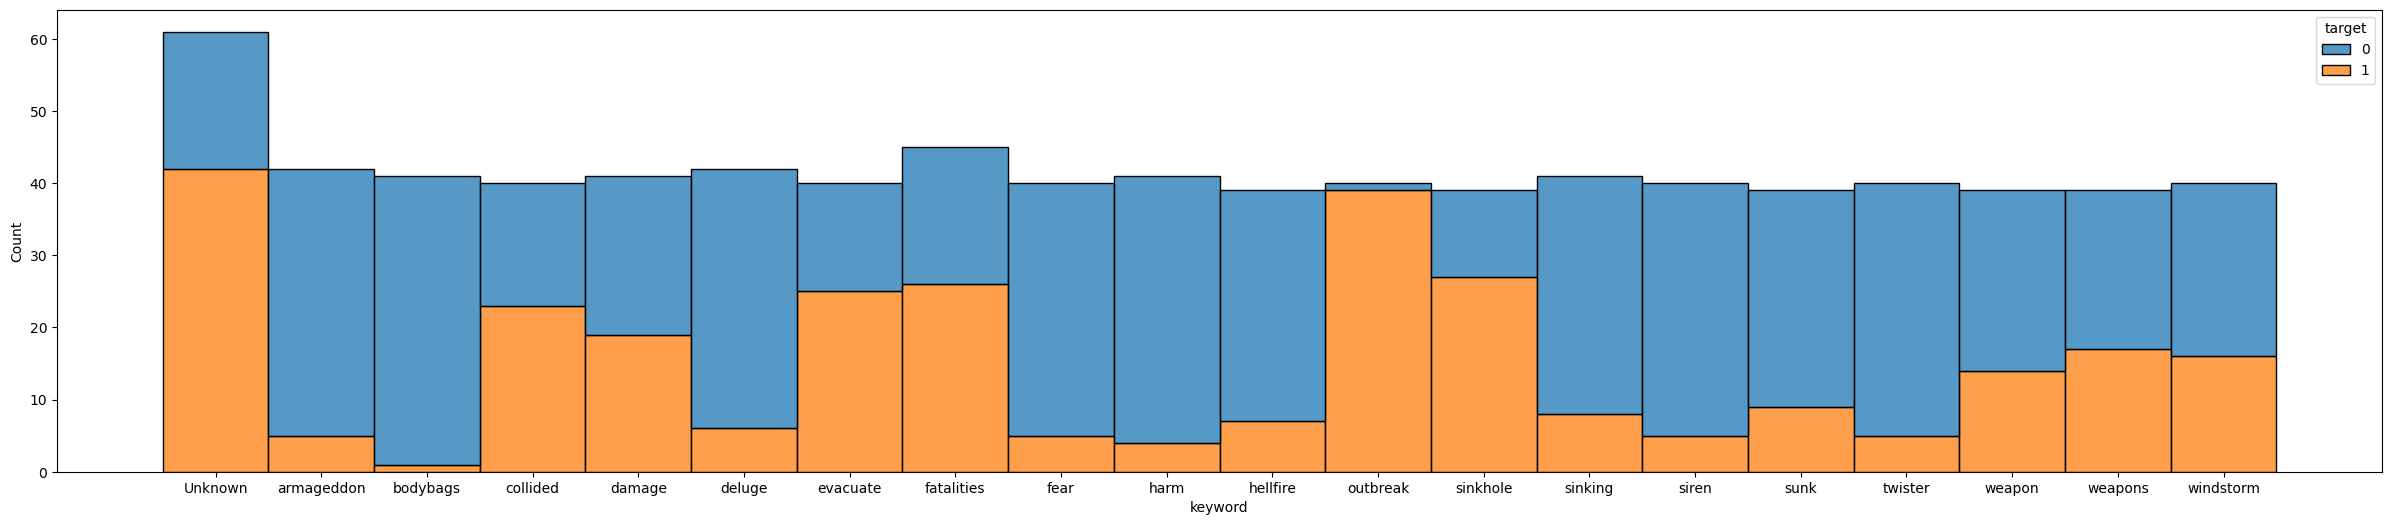

In [16]:
top_locations = train["keyword"].value_counts().nlargest(20).index
train_top_locations = train[train["keyword"].isin(top_locations)]

plt.figure(figsize=[30,6])
sns.histplot(data=train_top_locations, x="keyword", hue="target", multiple="stack")
plt.show()


In [17]:
negative_filtered = train[train["target"] == 0].loc[~train["location"].str.contains("Unnamed")]

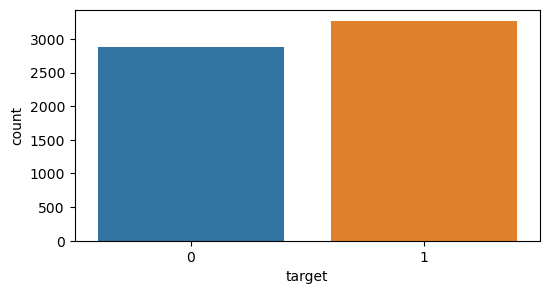

In [18]:
positive = train[train["target"] == 1]

positive = train[train["target"] == 1]
combined_data = pd.concat([positive, negative_filtered])
combined_data_shuffled = combined_data.sample(frac=1, random_state=42)
combined_data_shuffled


plt.figure(figsize=[6,3])
sns.countplot(x = combined_data_shuffled["target"], data = combined_data_shuffled)
plt.show()

In [19]:
x = combined_data_shuffled["text"] + combined_data_shuffled["keyword"] + combined_data_shuffled["location"]
y = combined_data_shuffled.iloc[:, -1]

In [20]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=32)

In [21]:
from sklearn.feature_extraction.text import CountVectorizer
vec = CountVectorizer()

x_train = vec.fit_transform(x_train).toarray()
x_test = vec.transform(x_test).toarray()

In [22]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(4923, 14913) (4923,)
(1231, 14913) (1231,)


In [23]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(x_train, y_train)

model.score(x_test, y_test)

0.6474411047928513

In [24]:
from sklearn.ensemble import RandomForestClassifier
model2 = RandomForestClassifier()
model2.fit(x_train, y_train)

model2.score(x_test, y_test)

0.7652315190901706

In [25]:
from xgboost import XGBClassifier
model3 = XGBClassifier()
model3.fit(x_train, y_train)

model3.score(x_test, y_test)

0.7652315190901706